In [13]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [14]:
def hair_remove(image):
    
    # convert image to grayScale
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    
    final_image = cv2.medianBlur(final_image,5)
    
    return final_image

- Scikit-image는 이미지 처리 파이썬 패키지로 numpy 배열로 동작함

- skimage로 임포트 할 수 있음.

In [15]:
from skimage.io import imread_collection

#your path 
col_dir = '/content/drive/MyDrive/흑색종 프로젝트 이미지/*.jpg'

#creating a collection with the available images
col = imread_collection(col_dir)
col

In [16]:
col.files

['/content/drive/MyDrive/흑색종 프로젝트 이미지/ISIC_0000210.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b8.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b20.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b28.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b33.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b43r.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b65.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b76.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b88.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_b89.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_m7.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_m14.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_m84.jpg',
 '/content/drive/MyDrive/흑색종 프로젝트 이미지/isic_m140.jpg']

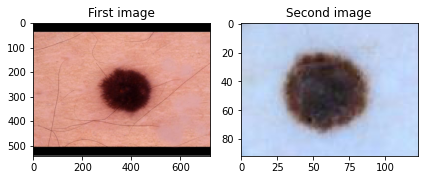

In [17]:
%matplotlib inline
fig,axes = plt.subplots(nrows=1,ncols=2)
ax = axes.ravel()
ax[0].imshow(col[0], cmap='gray')
ax[0].set_title('First image')

ax[1].imshow(col[1], cmap='gray')
ax[1].set_title('Second image')
plt.tight_layout()
plt.show()

- glob : 많은 파일들을 다뤄야 하는 파이썬 프로그램을 작성할 때, 특정한 패턴이나 확장자를 가진 파일들의 경로가 이름이 필요할 때가 있음. glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환.

- 단, 조건에 정규식을 사용할 수 없으며, 엑셀 등에서도 사용할 수 있는 '*'와 '?'같은 와일드카드만을 지원한다.

In [18]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/흑색종 프로젝트 이미지/*.jpg")] 

for i in range(len(images)):
    cv2.imshow("IMG"+str(i), images[i])    # the arguments of imshow are (name of image, image object)

DisabledFunctionError: ignored

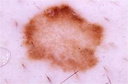

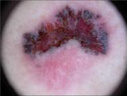

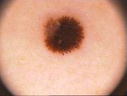

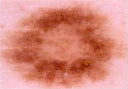

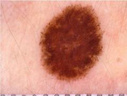

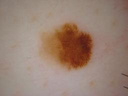

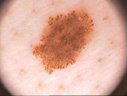

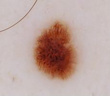

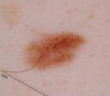

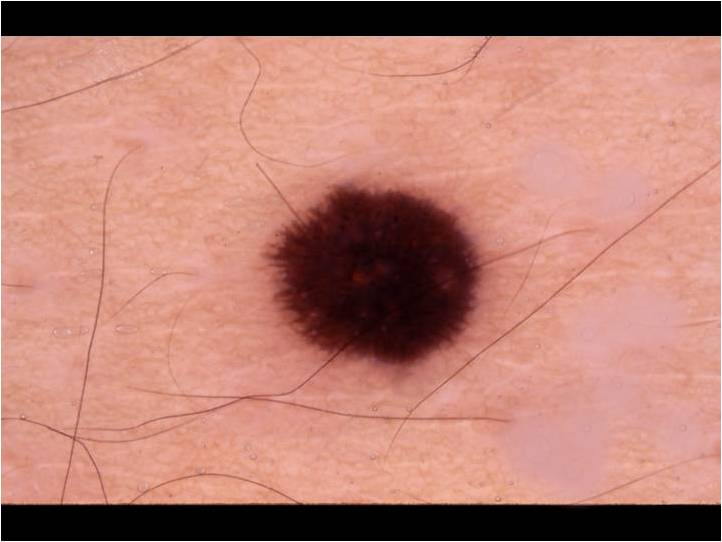

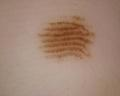

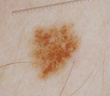

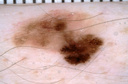

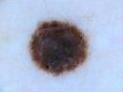

In [19]:
import glob
import cv2
from google.colab.patches import cv2_imshow

images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/흑색종 프로젝트 이미지/*.jpg")] 

for i in range(len(images)):
    cv2_imshow(images[i])    # the arguments of imshow are (name of image, image object)

In [20]:
import glob
cv_img = []
for img in glob.glob("/content/drive/MyDrive/흑색종 프로젝트 이미지/*.jpg"):
    n= cv2.imread(img)
    cv_img.append(n)
cv_img

[array([[[246, 219, 239],
         [242, 215, 235],
         [242, 215, 235],
         ...,
         [255, 228, 244],
         [252, 226, 239],
         [245, 232, 240]],
 
        [[244, 217, 237],
         [239, 212, 232],
         [239, 212, 232],
         ...,
         [253, 226, 242],
         [250, 224, 237],
         [243, 230, 238]],
 
        [[246, 219, 239],
         [242, 215, 235],
         [242, 215, 235],
         ...,
         [254, 227, 243],
         [252, 226, 240],
         [245, 232, 240]],
 
        ...,
 
        [[238, 216, 235],
         [232, 210, 229],
         [235, 212, 234],
         ...,
         [234, 203, 230],
         [231, 200, 227],
         [228, 214, 226]],
 
        [[232, 210, 228],
         [226, 204, 223],
         [229, 206, 228],
         ...,
         [235, 204, 231],
         [234, 203, 230],
         [229, 215, 227]],
 
        [[235, 216, 233],
         [227, 207, 226],
         [231, 210, 232],
         ...,
         [239, 208, 235],
  

In [21]:
len(cv_img)

14

In [22]:
for idx,val in enumerate(cv_img):
    print('{0} 번째 이미지 : shape {1}'.format(idx,val.shape))

0 번째 이미지 : shape (84, 128, 3)
1 번째 이미지 : shape (96, 127, 3)
2 번째 이미지 : shape (96, 127, 3)
3 번째 이미지 : shape (89, 128, 3)
4 번째 이미지 : shape (96, 127, 3)
5 번째 이미지 : shape (96, 128, 3)
6 번째 이미지 : shape (96, 127, 3)
7 번째 이미지 : shape (96, 110, 3)
8 번째 이미지 : shape (96, 110, 3)
9 번째 이미지 : shape (542, 722, 3)
10 번째 이미지 : shape (96, 120, 3)
11 번째 이미지 : shape (96, 110, 3)
12 번째 이미지 : shape (84, 128, 3)
13 번째 이미지 : shape (92, 123, 3)


[[[246 219 239]
  [242 215 235]
  [242 215 235]
  ...
  [255 228 244]
  [252 226 239]
  [245 232 240]]

 [[244 217 237]
  [239 212 232]
  [239 212 232]
  ...
  [253 226 242]
  [250 224 237]
  [243 230 238]]

 [[246 219 239]
  [242 215 235]
  [242 215 235]
  ...
  [254 227 243]
  [252 226 240]
  [245 232 240]]

 ...

 [[238 216 235]
  [232 210 229]
  [235 212 234]
  ...
  [234 203 230]
  [231 200 227]
  [228 214 226]]

 [[232 210 228]
  [226 204 223]
  [229 206 228]
  ...
  [235 204 231]
  [234 203 230]
  [229 215 227]]

 [[235 216 233]
  [227 207 226]
  [231 210 232]
  ...
  [239 208 235]
  [238 207 234]
  [230 216 228]]]
(128, 84)
[[[43 44 42]
  [19 20 18]
  [22 23 21]
  ...
  [24 24 24]
  [24 24 24]
  [20 20 20]]

 [[21 22 20]
  [ 0  1  0]
  [ 2  3  1]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 0  0  0]]

 [[22 23 21]
  [ 0  1  0]
  [ 3  4  2]
  ...
  [ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]]

 ...

 [[21 21 21]
  [ 1  1  1]
  [ 3  3  3]
  ...
  [ 2  2  2]
  [ 0  0  0]
  [ 0  1  0]]

 [[21 21 2

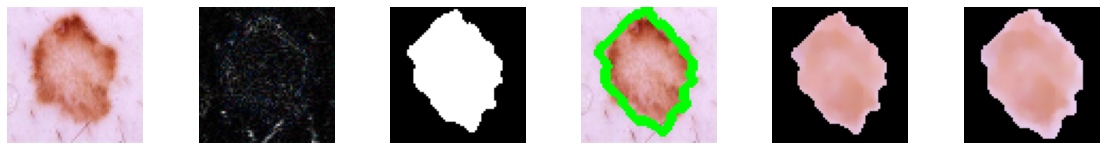

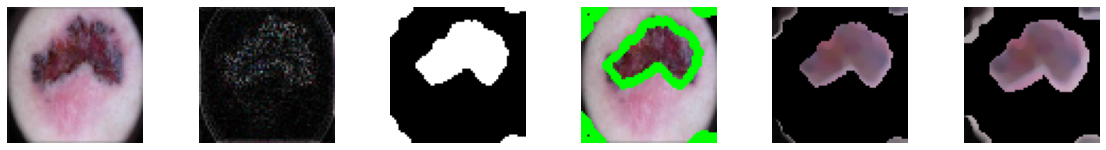

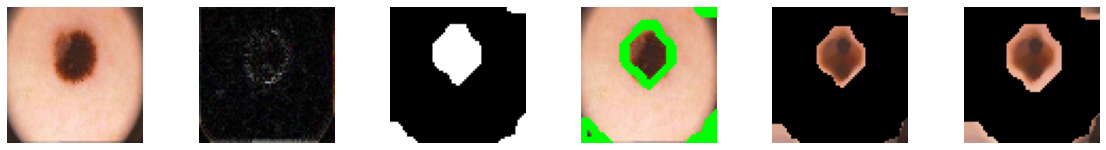

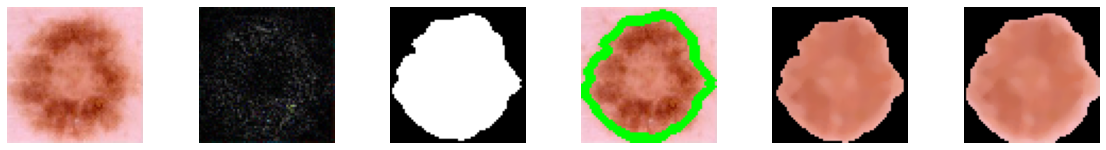

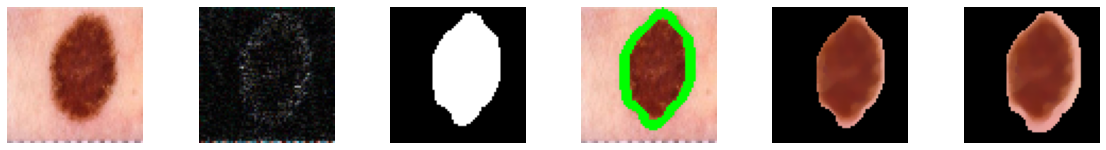

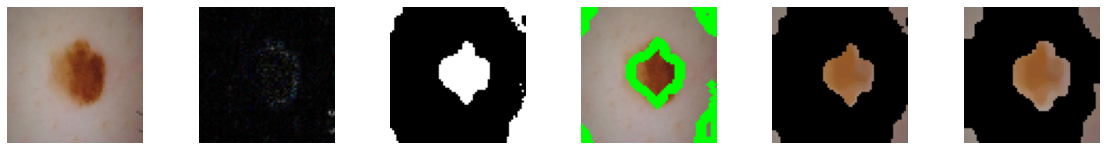

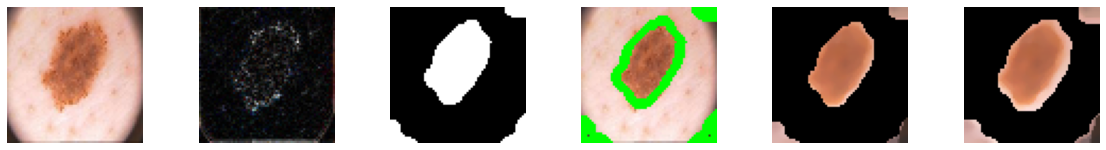

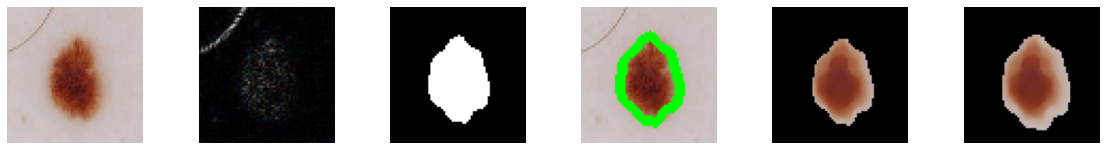

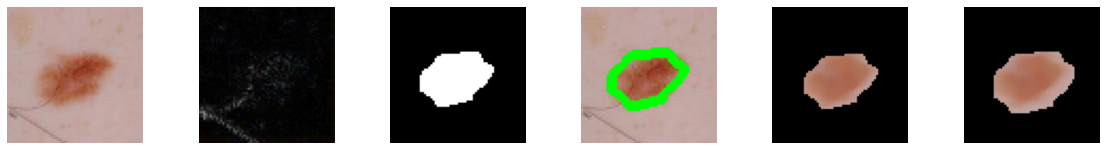

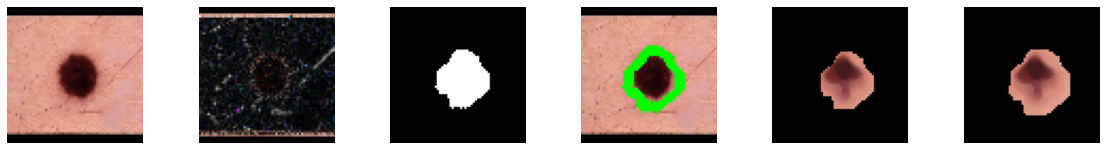

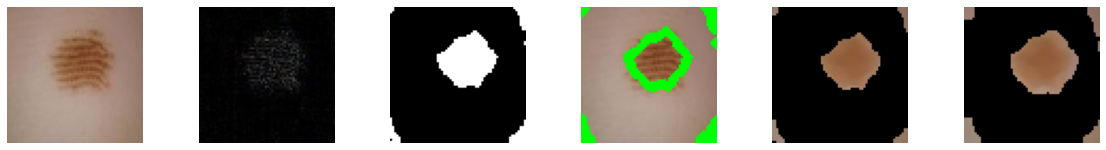

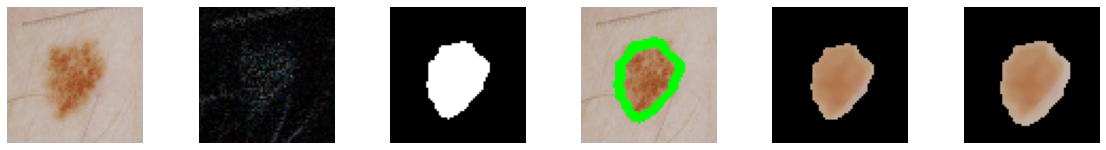

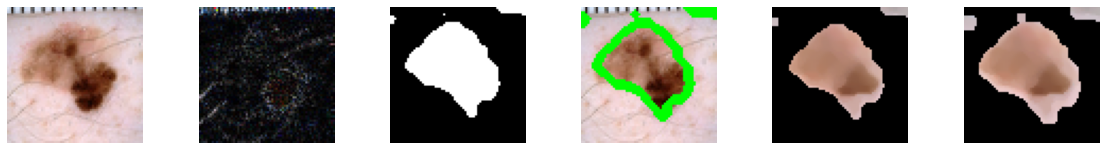

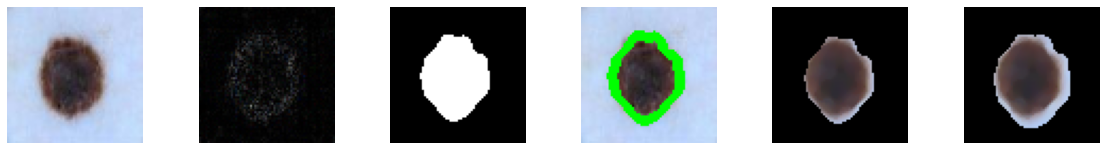

In [23]:
import glob
for img in glob.glob("/content/drive/MyDrive/흑색종 프로젝트 이미지/*.jpg"):
    
    # Set Up matplotlib figure size
    plt.figure(figsize=(20,2.5))
    
    # read and reduce the image size to 512 by 512 pixels 
    image = cv2.imread(img)
    print(image)
    image_resize = cv2.resize(image,(64,64),interpolation=cv2.INTER_CUBIC)
    height,width, layers = image.shape
    size = (width,height)
    print(size)

    # original image plot 
    plt.subplot(1, 6, 1)
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # plt.title('Original : '+" T :" + str(target[i]))
 

    # Create an Edge detection Laplacian filter
    lap = cv2.Laplacian(image_resize,cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))
    
    plt.subplot(1, 6, 2)
    plt.imshow(cv2.cvtColor(lap, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # plt.title('Edge detection '+ " T :" + str(target[i]))
    
    # Hair removal and adaptive threshold 
    final_image = hair_remove(image_resize)
    gray = cv2.cvtColor(final_image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,256,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,73,7)
    
    # ploting the threshold 
    plt.subplot(1, 6, 3)
    plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # plt.title('processed image : '+" T :" + str(target[i]))

    
    # finding the contours on the image 
    c,h=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    cv2.drawContours(image_resize,c,-1,(0,255,0),3)
    

    # ploting the contours 
    plt.subplot(1, 6, 4)
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # plt.title('Skin Marks detections v1:' +" T  :" + str(target[i]))
    
    
    # creating dilate with 2 by 2 kernel 
    kernel = np.ones((2,2),np.uint8)
    dial1 = cv2.dilate(thresh,kernel,iterations=3)
    
    # create a morphologyEx it's like the dilate but sharper
    kernel = np.ones((2,2),np.uint8)
    dial = cv2.morphologyEx(thresh,cv2.MORPH_ELLIPSE,kernel)
    
    # create the final image 
    img1=cv2.bitwise_and(final_image, final_image, mask=dial1)
    img2=cv2.bitwise_and(final_image, final_image, mask=dial)
    
    #ploting the Lesions extraction 
    plt.subplot(1, 6, 5)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # plt.title('Lesions extraction v1'+ " T :" + str(target[i]))
    
    plt.subplot(1, 6,6)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # plt.title('Lesions extraction v2'+ " T :" + str(target[i]))
    
    plt.plot()